In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
x= df.iloc[:,:7]
y = df.iloc[:,7]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report

In [7]:
knn_classifer = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn_classifer.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_pred1 = knn_classifer.predict(x_test)

In [10]:
accuracy_score(y_test,y_pred1)

0.8986404467103666

In [11]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7325
           1       0.55      0.46      0.50       913

    accuracy                           0.90      8238
   macro avg       0.74      0.71      0.72      8238
weighted avg       0.89      0.90      0.89      8238



In [12]:
knn_regression = KNeighborsRegressor(n_neighbors=5)

In [13]:
knn_regression.fit(x_train,y_train)

KNeighborsRegressor()

In [14]:
y_pred2 = knn_classifer.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred2)

0.8986404467103666

In [16]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7325
           1       0.55      0.46      0.50       913

    accuracy                           0.90      8238
   macro avg       0.74      0.71      0.72      8238
weighted avg       0.89      0.90      0.89      8238



In [17]:
K = np.arange(1,40)

In [18]:
K

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [19]:
MCE = []
for k in K:
    model =KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    yp = model.predict(x_test)
    MCE.append(1-accuracy_score(y_test,yp))
MCE    

[0.11422675406652105,
 0.10148094197620783,
 0.10087399854333579,
 0.10050983248361256,
 0.10135955328963342,
 0.10123816460305901,
 0.09759650400582665,
 0.09735372663267783,
 0.09638261714008256,
 0.09601845108035933,
 0.09674678319980579,
 0.09650400582665697,
 0.0943190094683175,
 0.09456178684146632,
 0.09480456421461525,
 0.09480456421461525,
 0.09480456421461525,
 0.09346928866229665,
 0.09298373391599901,
 0.0927409565428502,
 0.09201262442340374,
 0.09298373391599901,
 0.09201262442340374,
 0.09128429230395729,
 0.09261956785627579,
 0.09213401310997815,
 0.09359067734887105,
 0.09225540179655256,
 0.09249817916970138,
 0.09164845836368052,
 0.09116290361738288,
 0.09092012624423407,
 0.09079873755765966,
 0.09116290361738288,
 0.08982762806506439,
 0.08934207331876665,
 0.08922068463219224,
 0.08837096382617138,
 0.08922068463219224]

In [20]:
import matplotlib.pyplot as plt

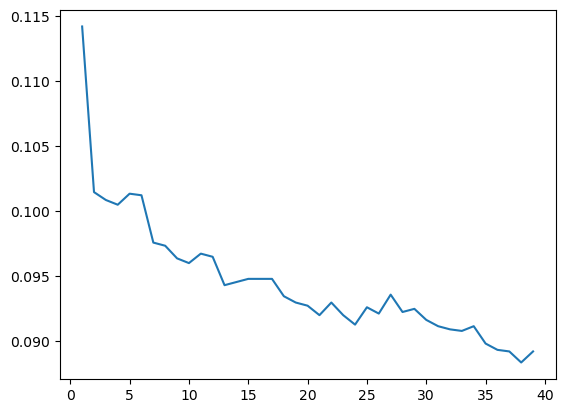

In [21]:
plt.plot(K,MCE)

In [44]:
params = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10]}
model3 = KNeighborsClassifier()
cval= KFold(n_splits=11)

In [45]:
gsearch = GridSearchCV(model3,params,cv= cval)

In [46]:
result = gsearch.fit(x_train,y_train)

In [47]:
result.best_params_

{'n_neighbors': 9}

In [48]:
knn_classifer_best = KNeighborsClassifier(n_neighbors=9)

In [49]:
knn_classifer_best.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
y_pred_best = knn_classifer_best.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_best)

0.9036173828599174